In [38]:
# 导入库
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 创建一个空图
G = nx.Graph()#  无向图
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

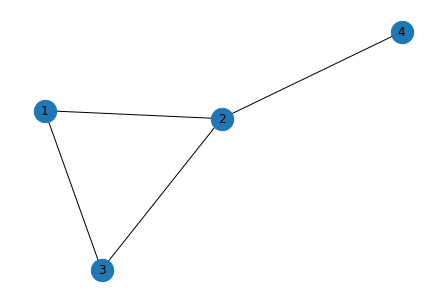

In [3]:
# 可视化
nx.draw(G, node_size=500, with_labels=True)

### 获取图的邻接矩阵

In [4]:
#获取图的所有边
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24596\479967812.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


In [6]:
#转化为二维数组形式的矩阵
A = As.todense()
A

matrix([[0, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [0, 1, 0, 0]], dtype=int32)

### 已知图的邻接矩阵, 创建图

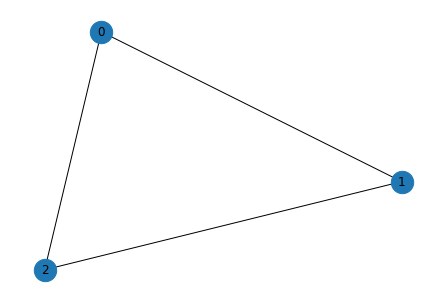

In [11]:
A = np.array([[0,1,1],[1,0,1],[1,1,0]])
G = nx.from_numpy_matrix(A)
nx.draw(G, node_size=500, with_labels=True)

### 加权图

In [16]:
G = nx.Graph()
# 读取的是一个一个元组, 每个元组代表(节点, 节点, 权重)
G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24596\4085683469.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


### 度, 平均度, 度分布

In [19]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 4)])

In [29]:
# 获取网络G的度
d = dict(nx.degree(G))
print(d)
print("平均度为: ", sum(d.values())/len(G.nodes)

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为:  2.0


In [37]:
# 获取度分布
nx.degree_histogram(G) # 返回所有位于区间(0, dmax)的度值的频数列表

[0, 1, 2, 1]

### 绘制度分布直方图

In [45]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes()) for i in nx.degree_histogram(G)]
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

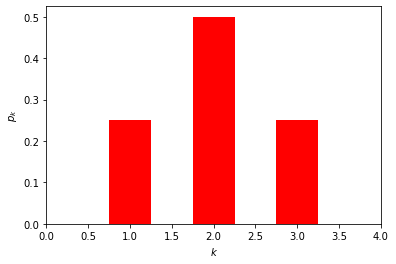

In [46]:
plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0, max(x)+1])

### 路径和距离

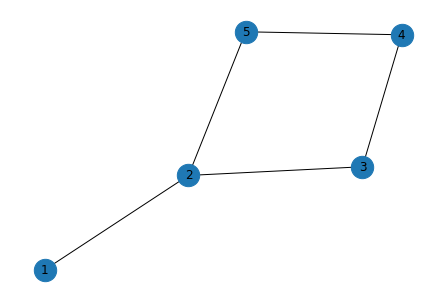

In [48]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1, 2), (2, 3), (2, 5), (3, 4), (4, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [49]:
nx.shortest_path(G, source=1, target=4)

[1, 2, 3, 4]

In [51]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G, source=1, target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [52]:
# 求两个节点之间的距离(即最短路径长度)
nx.shortest_path_length(G, source=1, target=4)

3

In [53]:
# 求整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

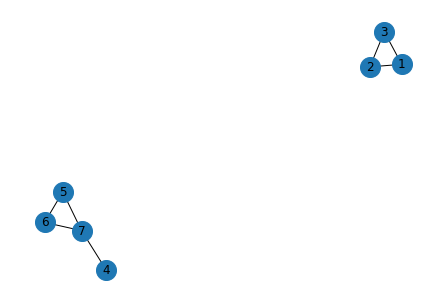

In [63]:
Ga = nx.Graph()
Ga.add_nodes_from([1, 2 ,3, 4, 5, 6, 7])
Ga.add_edges_from([(1, 2), (1, 3), (2, 3), (4, 7), (5, 6), (5, 7), (6, 7)])
nx.draw(Ga, node_size=400, with_labels=True)

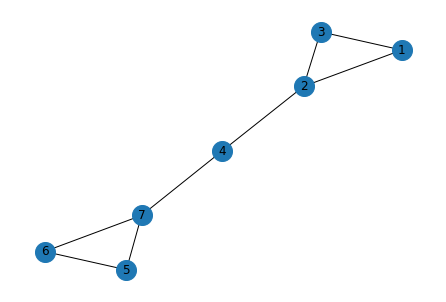

In [64]:
Gb = nx.Graph()
Gb.add_nodes_from([1, 2 ,3, 4, 5, 6, 7])
Gb.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (4, 7), (5, 6), (5, 7), (6, 7)])
nx.draw(Gb, node_size=400, with_labels=True)

In [65]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


### 集聚系数

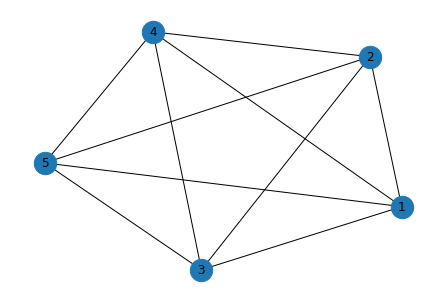

In [67]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [69]:
print(nx.clustering(G, 1))

1.0


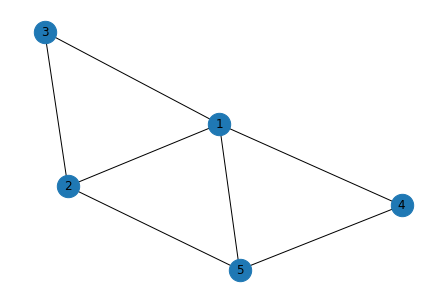

In [71]:
G.remove_edges_from([(2, 4), (3, 4), (3, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [73]:
print(nx.clustering(G, 1))

0.5


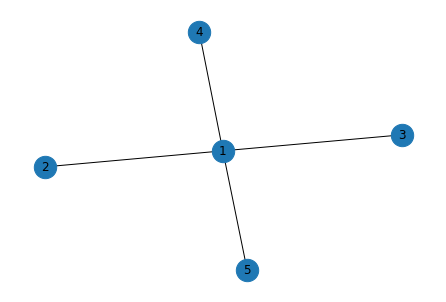

In [75]:
G.remove_edges_from([(2, 3), (2, 5), (4, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [76]:
print(nx.clustering(G, 1))

0


### 平均集聚系数与全局集聚系数的区别

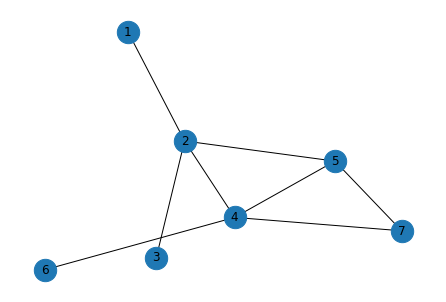

In [78]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2), (2,3), (2,4), (2, 5), (4, 5), (4, 6), (4, 7), (5, 7)])
nx.draw(G, node_size=500, with_labels=True)

In [79]:
# 平均集聚系数(所有节点的集聚系数取平均)
print(nx.average_clustering(G))

0.3095238095238095


In [80]:
# 全局集聚系数(所有三角形数量除以所有三元组数量)
print(nx.transitivity(G))

0.375
